# Life After Work

## Main question:

- Is life expectancy increasing faster than retirement age?

### Secondary questions:
- How have life expectancy and retirement age changed over time?
- How many years, on average, do people live after retiring?
- What are the countries with the highest and lowest remaining life expectancy after retirement?
- And what about <span style="color:green"><font size="5">**healthy**</font></span> life expectancy?

## Data source:

[Our World in Data](https://ourworldindata.org)

### Understanding the data:
- How life expectancy is calculated [period vs cohort](https://ourworldindata.org/period-versus-cohort-measures-whats-the-difference)
- "Learn more about this data" on each table's 

## EDA

In [1]:
from os.path import exists
from os import mkdir
from pandas import read_csv, merge
from IPython.display import HTML
import plotly.express as px
from plotly.colors import DEFAULT_PLOTLY_COLORS as colors
from plotly.io import templates
templates.default = 'none'

In [2]:
def output_header(t):
    return HTML(f'<br><h4>{t}</h4>')

def load_N_clean(csv_file_path):
    df = read_csv(csv_file_path)
    
    display(output_header('Dataframe info:'))
    df.info()

    display(output_header('Numeric data description:'))
    print(df.describe())
    
    display(output_header('NA value counts:'))
    print(df.isna().sum())
    
    display(output_header('Entities missing Code:'))
    print(df.Entity.loc[df.Code.isna()].value_counts())

    return df

def print_fig(name, width=1000, height=650):
    fig.update_layout(width=width, height=height, font_size=20)
    fig.write_image(f'images/{name}.png')
    fig.show()

    with open(f'plots/{name}.html', 'w') as fh:
        fh.write(
f'''<!DOCTYPE html>
<html>
    <head>
        <meta charset="utf-8" />
    </head>
    <body style="background-color: #6aa4c8; height: 900px; display: flex; justify-content: center; align-items: center;">
        { fig.to_html(full_html=False, include_plotlyjs='cns') }
    </body>
</html>'''
        )

if not exists('images'):
    mkdir('images')
if not exists('plots'):
    mkdir('plot')

### Clean and merge retirement data

#### Average effective age of retirement, women

In [3]:
retirement_w = load_N_clean('data/average-effective-retirement-women.csv')

# Entities without Code are not present in the life expectancy data, so it is safe to remove them
retirement_w.dropna(inplace=True)
display(output_header('Clean DF preview:'))
retirement_w

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Entity                                             2153 non-null   object 
 1   Code                                               2055 non-null   object 
 2   Year                                               2153 non-null   int64  
 3   Average effective age of retirement, women (OECD)  2153 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.4+ KB


              Year  Average effective age of retirement, women (OECD)
count  2153.000000                                        2153.000000
mean   1996.069206                                          63.071807
std      13.739624                                           4.077087
min    1970.000000                                          51.599998
25%    1985.000000                                          60.300000
50%    1997.000000                                          62.700000
75%    2008.000000                                          65.400000
max    2018.000000                                          80.300000


Entity                                                0
Code                                                 98
Year                                                  0
Average effective age of retirement, women (OECD)     0
dtype: int64


Entity
Europe average    49
OECD average      49
Name: count, dtype: int64


Entity Code  Year  \
0         Argentina  ARG  1982   
1         Argentina  ARG  1983   
2         Argentina  ARG  1984   
3         Argentina  ARG  1985   
4         Argentina  ARG  1986   
...             ...  ...   ...   
2148  United States  USA  2014   
2149  United States  USA  2015   
2150  United States  USA  2016   
2151  United States  USA  2017   
2152  United States  USA  2018   

      Average effective age of retirement, women (OECD)  
0                                             70.900000  
1                                             67.300000  
2                                             67.900000  
3                                             68.000000  
4                                             68.400000  
...                                                 ...  
2148                                          64.700000  
2149                                          64.800000  
2150                                          65.400000  
2151                                          65.900002  
2152                                          66.500000  

[2055 rows x 4 columns]

#### Average effective age of retirement, men

In [4]:
retirement_m = load_N_clean('data/average-effective-retirement-men.csv')

# Entities without Code are not present in the life expectancy data, so it is safe to remove them
retirement_m.dropna(inplace=True)
display(output_header('Clean DF preview:'))
retirement_m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           2153 non-null   object 
 1   Code                                             2055 non-null   object 
 2   Year                                             2153 non-null   int64  
 3   Average effective age of retirement, men (OECD)  2153 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.4+ KB


              Year  Average effective age of retirement, men (OECD)
count  2153.000000                                      2153.000000
mean   1996.069206                                        65.139805
std      13.739624                                         3.836498
min    1970.000000                                        57.000000
25%    1985.000000                                        62.400000
50%    1997.000000                                        64.600000
75%    2008.000000                                        67.400000
max    2018.000000                                        79.300000


Entity                                              0
Code                                               98
Year                                                0
Average effective age of retirement, men (OECD)     0
dtype: int64


Entity
Europe average    49
OECD average      49
Name: count, dtype: int64


Entity Code  Year  \
0         Argentina  ARG  1982   
1         Argentina  ARG  1983   
2         Argentina  ARG  1984   
3         Argentina  ARG  1985   
4         Argentina  ARG  1986   
...             ...  ...   ...   
2148  United States  USA  2014   
2149  United States  USA  2015   
2150  United States  USA  2016   
2151  United States  USA  2017   
2152  United States  USA  2018   

      Average effective age of retirement, men (OECD)  
0                                           66.600000  
1                                           66.400000  
2                                           66.200000  
3                                           65.800000  
4                                           66.600000  
...                                               ...  
2148                                        65.900000  
2149                                        66.100000  
2150                                        66.800000  
2151                                        67.599998  
2152                                        67.900002  

[2055 rows x 4 columns]

#### Merge the two retirement DFs

In [5]:
# Merge the two retirement tables and create a column with the average of the effective age of retirement from both tables
retirement = merge(retirement_w, retirement_m)

retirement.rename(columns={'Average effective age of retirement, women (OECD)':'Women',
                           'Average effective age of retirement, men (OECD)':'Men'}, inplace=True)
retirement['Retirement'] = retirement.loc[:, ('Women','Men')].mean(axis=1)

display(output_header(f'Merged retirement DF has data on {retirement.Entity.nunique()} countries '+
      f'from {retirement.Year.min()} to {retirement.Year.max()}.\n'))
retirement

Entity Code  Year      Women        Men  Retirement
0         Argentina  ARG  1982  70.900000  66.600000   68.750000
1         Argentina  ARG  1983  67.300000  66.400000   66.850000
2         Argentina  ARG  1984  67.900000  66.200000   67.050000
3         Argentina  ARG  1985  68.000000  65.800000   66.900000
4         Argentina  ARG  1986  68.400000  66.600000   67.500000
...             ...  ...   ...        ...        ...         ...
2050  United States  USA  2014  64.700000  65.900000   65.300000
2051  United States  USA  2015  64.800000  66.100000   65.450000
2052  United States  USA  2016  65.400000  66.800000   66.100000
2053  United States  USA  2017  65.900002  67.599998   66.750000
2054  United States  USA  2018  66.500000  67.900002   67.200001

[2055 rows x 6 columns]

In [6]:
fig = px.line(
    retirement.loc[retirement.Entity=='Portugal'],
    x='Year', y=['Men','Women'],
    title='Average effective age of retirement in Portugal',
    labels={'value':'Age (Years)', 'variable':'Sex'}
)
print_fig('PT_Retirement')

### Clean life expectancy data

#### Period life expectancy at birth

In [7]:
life_exp = load_N_clean('data/life-expectancy.csv')

# Those entities with missing Code will be removed with the last inner join.
life_exp.rename(
    columns={'Period life expectancy at birth - Sex: total - Age: 0':'Expectancy'},
    inplace=True
)

display(output_header(f'Clean Life Expectancy DF has data on {life_exp.Entity.nunique()} countries '+
      f'from {life_exp.Year.min()} to {life_exp.Year.max()}.\n'))

display(output_header('Clean DF preview:'))
life_exp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 21565 non-null  object 
 1   Code                                                   19609 non-null  object 
 2   Year                                                   21565 non-null  int64  
 3   Period life expectancy at birth - Sex: total - Age: 0  21565 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 674.0+ KB


               Year  Period life expectancy at birth - Sex: total - Age: 0
count  21565.000000                                       21565.000000    
mean    1976.992812                                          61.942238    
std       38.461606                                          12.925909    
min     1543.000000                                          10.989100    
25%     1962.000000                                          52.703000    
50%     1982.000000                                          64.479900    
75%     2003.000000                                          71.978900    
max     2023.000000                                          86.372400    


Entity                                                      0
Code                                                     1956
Year                                                        0
Period life expectancy at birth - Sex: total - Age: 0       0
dtype: int64


Entity
England and Wales                                              109
Scotland                                                        95
Europe                                                          81
Americas                                                        80
Asia                                                            78
Oceania                                                         77
Africa                                                          76
Land-locked Developing Countries (LLDC)                         74
High-income countries                                           74
High-and-upper-middle-income countries                          74
Least developed countries                                       74
Latin America and the Caribbean                                 74
Less developed regions                                          74
Less developed regions, excluding China                         74
Low-and-middle-income countries                        

Entity Code  Year  Expectancy
0      Afghanistan  AFG  1950     28.1563
1      Afghanistan  AFG  1951     28.5836
2      Afghanistan  AFG  1952     29.0138
3      Afghanistan  AFG  1953     29.4521
4      Afghanistan  AFG  1954     29.6975
...            ...  ...   ...         ...
21560     Zimbabwe  ZWE  2019     61.0603
21561     Zimbabwe  ZWE  2020     61.5300
21562     Zimbabwe  ZWE  2021     60.1347
21563     Zimbabwe  ZWE  2022     62.3601
21564     Zimbabwe  ZWE  2023     62.7748

[21565 rows x 4 columns]

#### Healthy life expectancy (HALE) at birth

In [8]:
hale = load_N_clean('data/healthy-life-expectancy-at-birth.csv')

# Those entities with missing Code will be removed with the last inner join.
hale.rename(columns={'Healthy life expectancy (HALE) at birth (years) - Sex: both sexes':'HALE'},
           inplace=True)

display(output_header(f'Clean HALE DF has data on {hale.Entity.nunique()} countries '+
      f'from {hale.Year.min()} to {hale.Year.max()}.\n'))

display(output_header('Clean DF preview:'))
hale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             756 non-null    object 
 1   Code                                                               732 non-null    object 
 2   Year                                                               756 non-null    int64  
 3   Healthy life expectancy (HALE) at birth (years) - Sex: both sexes  756 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ KB


             Year  \
count   756.00000   
mean   2011.00000   
std       7.11104   
min    2000.00000   
25%    2007.50000   
50%    2012.50000   
75%    2016.00000   
max    2019.00000   

       Healthy life expectancy (HALE) at birth (years) - Sex: both sexes  
count                                         756.000000                  
mean                                           61.388682                  
std                                             7.536516                  
min                                            27.978940                  
25%                                            56.299703                  
50%                                            63.365485                  
75%                                            66.882805                  
max                                            74.093760                  


Entity                                                                0
Code                                                                 24
Year                                                                  0
Healthy life expectancy (HALE) at birth (years) - Sex: both sexes     0
dtype: int64


Entity
Africa (WHO)                   4
Americas (WHO)                 4
Eastern Mediterranean (WHO)    4
Europe (WHO)                   4
South-East Asia (WHO)          4
Western Pacific (WHO)          4
Name: count, dtype: int64


Entity Code  Year      HALE
0     Afghanistan  AFG  2000  46.76397
1     Afghanistan  AFG  2010  51.13087
2     Afghanistan  AFG  2015  52.60495
3     Afghanistan  AFG  2019  53.94961
4    Africa (WHO)  NaN  2000  45.80384
..            ...  ...   ...       ...
751        Zambia  ZMB  2019  54.40409
752      Zimbabwe  ZWE  2000  41.02657
753      Zimbabwe  ZWE  2010  45.22416
754      Zimbabwe  ZWE  2015  51.16740
755      Zimbabwe  ZWE  2019  53.06544

[756 rows x 4 columns]

#### Merge the two life expectancy DFs

In [9]:
life = merge(life_exp, hale)

life['Sick'] = life.Expectancy - life.HALE

display(output_header(f'Merged Life Expectancy DF has data on {life.Entity.nunique()} countries '+
      f'from {life.Year.min()} to {life.Year.max()}.\n'))

life

Entity Code  Year  Expectancy      HALE     Sick
0    Afghanistan  AFG  2000     55.0047  46.76397  8.24073
1    Afghanistan  AFG  2010     60.7018  51.13087  9.57093
2    Afghanistan  AFG  2015     62.2695  52.60495  9.66455
3    Afghanistan  AFG  2019     62.9411  53.94961  8.99149
4        Albania  ALB  2000     74.8262  65.23516  9.59104
..           ...  ...   ...         ...       ...      ...
727       Zambia  ZMB  2019     62.9145  54.40409  8.51041
728     Zimbabwe  ZWE  2000     46.0339  41.02657  5.00733
729     Zimbabwe  ZWE  2010     51.9252  45.22416  6.70104
730     Zimbabwe  ZWE  2015     58.9895  51.16740  7.82210
731     Zimbabwe  ZWE  2019     61.0603  53.06544  7.99486

[732 rows x 6 columns]

#### Merge the retirement and life expectancy DFs

In [10]:
df = merge(retirement, life_exp)

df['Retired'] = df.Expectancy - df.Retirement

display(output_header(f'Merged Life Expectancy and Retirement DF has data on {df.Entity.nunique()} countries '+
      f'from {df.Year.min()} to {df.Year.max()}.\n'))

df

Entity Code  Year      Women        Men  Retirement  Expectancy  \
0         Argentina  ARG  1982  70.900000  66.600000   68.750000     68.9728   
1         Argentina  ARG  1983  67.300000  66.400000   66.850000     69.2905   
2         Argentina  ARG  1984  67.900000  66.200000   67.050000     69.3533   
3         Argentina  ARG  1985  68.000000  65.800000   66.900000     69.8793   
4         Argentina  ARG  1986  68.400000  66.600000   67.500000     70.2812   
...             ...  ...   ...        ...        ...         ...         ...   
2050  United States  USA  2014  64.700000  65.900000   65.300000     78.8785   
2051  United States  USA  2015  64.800000  66.100000   65.450000     78.7219   
2052  United States  USA  2016  65.400000  66.800000   66.100000     78.6860   
2053  United States  USA  2017  65.900002  67.599998   66.750000     78.6483   
2054  United States  USA  2018  66.500000  67.900002   67.200001     78.7997   

        Retired  
0      0.222800  
1      2.440500  
2      2.303300  
3      2.979300  
4      2.781200  
...         ...  
2050  13.578500  
2051  13.271900  
2052  12.586000  
2053  11.898300  
2054  11.599699  

[2055 rows x 8 columns]

## Addressing the initial questions

### How have life expectancy and retirement age changed over time?

In [11]:
def select_countries(df, column):
    
    def get_3(sorted_entities):
        l = []
        for c in sorted_entities:
            if c not in countries:
                l += [c]
                if len(l) > 2:
                    return l
        
    latest = df[df.Year==df.Year.max()]
    countries = ['Portugal', 'Spain']
    sorted_entities = latest.sort_values(column).Entity.tolist()
    smallest = get_3(sorted_entities)
    largest = get_3(reversed(sorted_entities))
    
    return countries + smallest + largest

color_list = ['red','green','#2346a6','#567fd9','#a2c8ff','#ff7e26','#ff9c59','#ffc99d']
label_dic = {
    'Expectancy':'Life Expectancy (Years)',
    'Retirement':'Retirement Age',
    'Entity':'Country',
    'Sick':'Life Expectancy - HALE (Years)',
    'Retired':'Years spent in Retirement' 
}

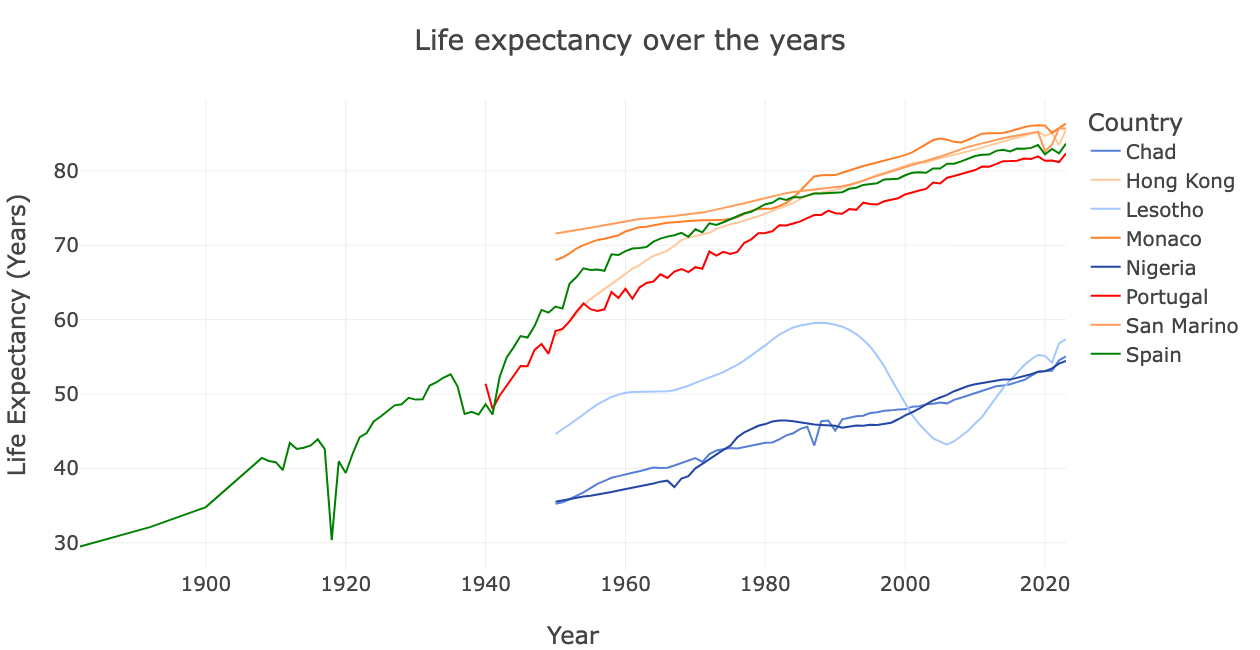

In [12]:
countries = select_countries(life_exp,'Expectancy')
fig = px.line(
    life_exp.loc[life_exp.Entity.isin(countries)],
    x='Year', y='Expectancy', color='Entity',
    title='Life expectancy over the years',
    labels=label_dic,
    color_discrete_map=dict(zip(countries, color_list))
)
print_fig('LifeExpectancy')

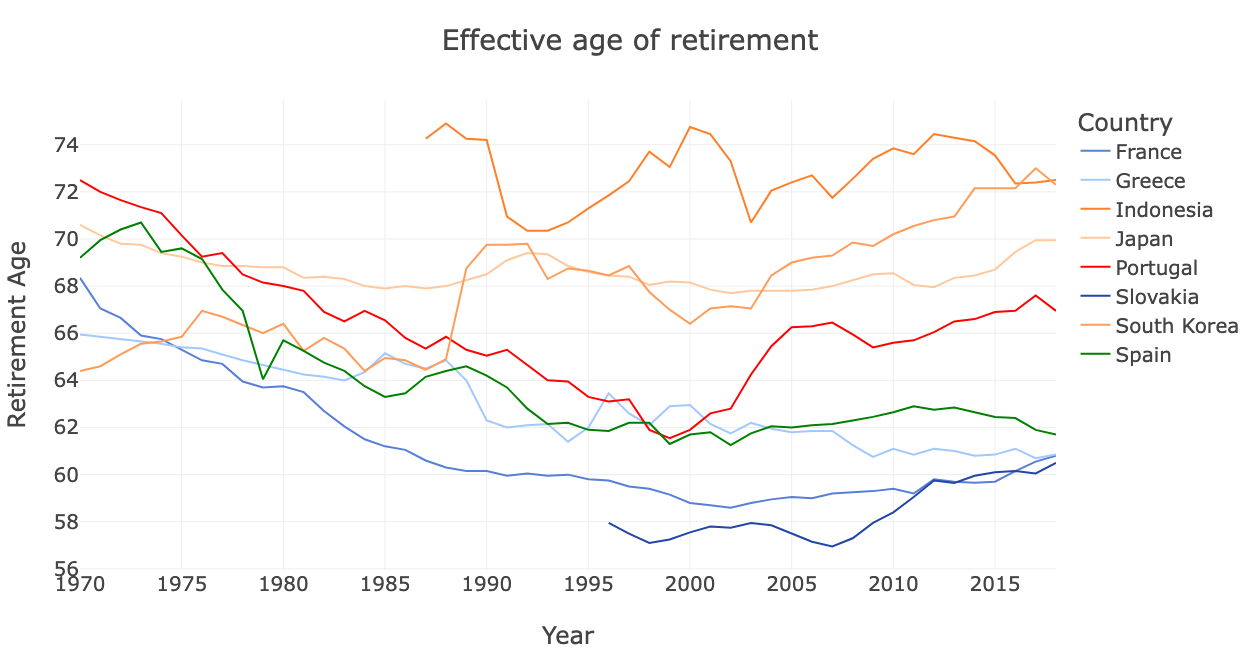

In [13]:
countries = select_countries(retirement, 'Retirement')
fig = px.line(
    retirement.loc[retirement.Entity.isin(countries)],
    x='Year', y='Retirement', color='Entity',
    title='Effective age of retirement',
    labels=label_dic,
    color_discrete_map=dict(zip(countries, color_list))
)
print_fig('RetirementAge')

#### HALE and Life Expectancy

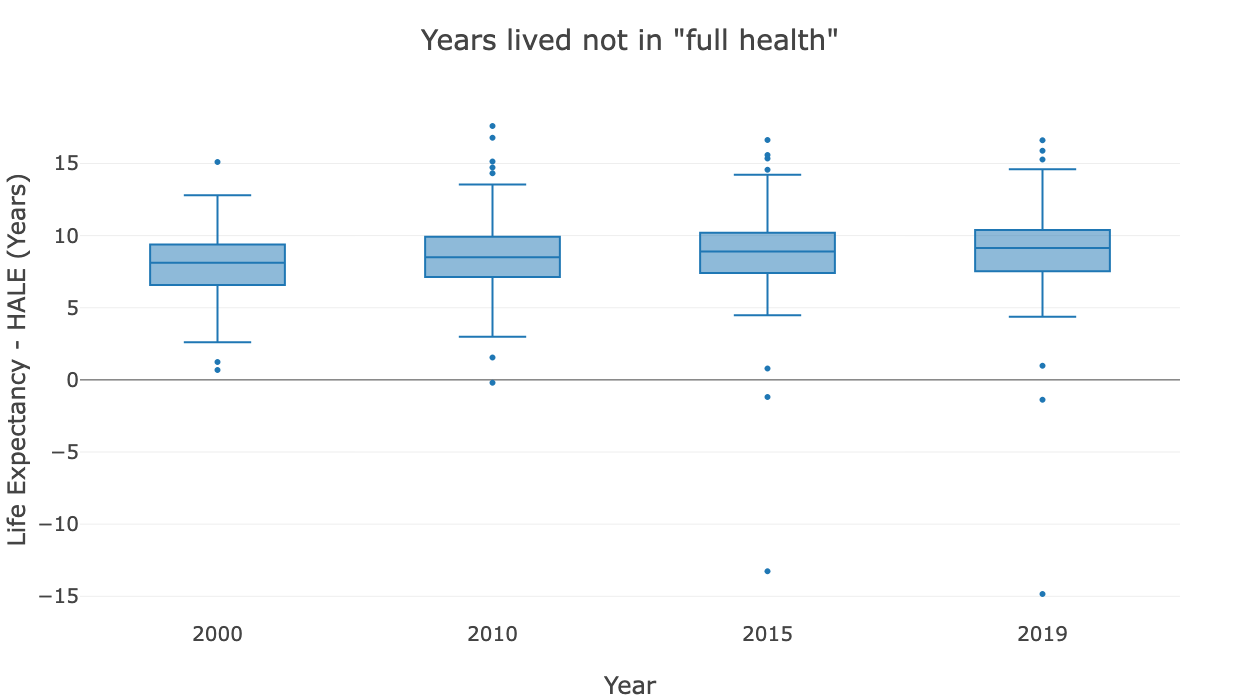

In [14]:
fig = px.box(
    life, x='Year', y='Sick',
    title='Years lived not in "full health"',
    labels=label_dic,
    hover_name='Entity'
)
fig.update_xaxes(type='category')
print_fig('HALEvsLifeExpectancy', 500, 700)

In [15]:
# Confirming the most extreme value in 2019
life.loc[(life.Entity=='Central African Republic') & (life.Year==2019)]

Entity Code  Year  Expectancy      HALE      Sick
127  Central African Republic  CAF  2019     31.5302  46.37131 -14.84111

In [16]:
countries = select_countries(life, 'Sick')
fig = px.line(
    life.loc[life.Entity.isin(countries)],
    x='Year', y='Sick', color='Entity',
    title='',
    labels=label_dic,
    color_discrete_map=dict(zip(countries, color_list))
)
fig

### How many years, on average, do people live after retiring?

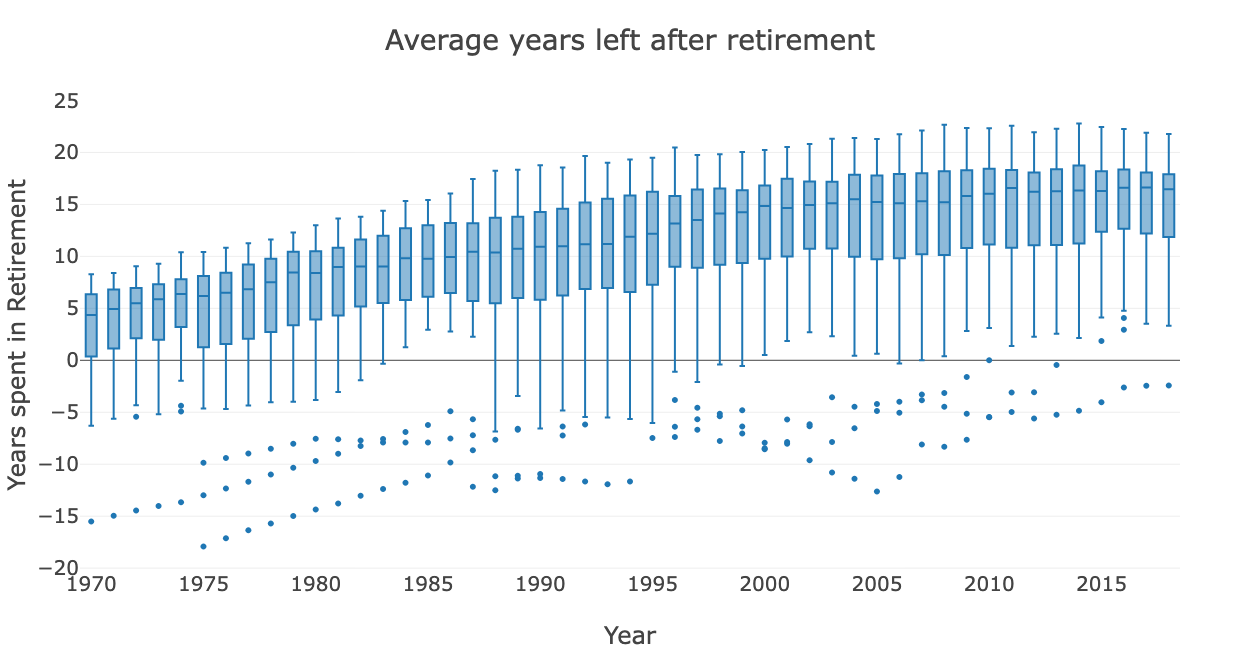

In [17]:
fig = px.box(
    df, x='Year', y='Retired',
    title='Average years left after retirement',
    labels=label_dic,
    hover_name='Entity'
)
print_fig('LifeAfterRetirement')

### What are the countries with the highest and lowest remaining life expectancy after retirement?

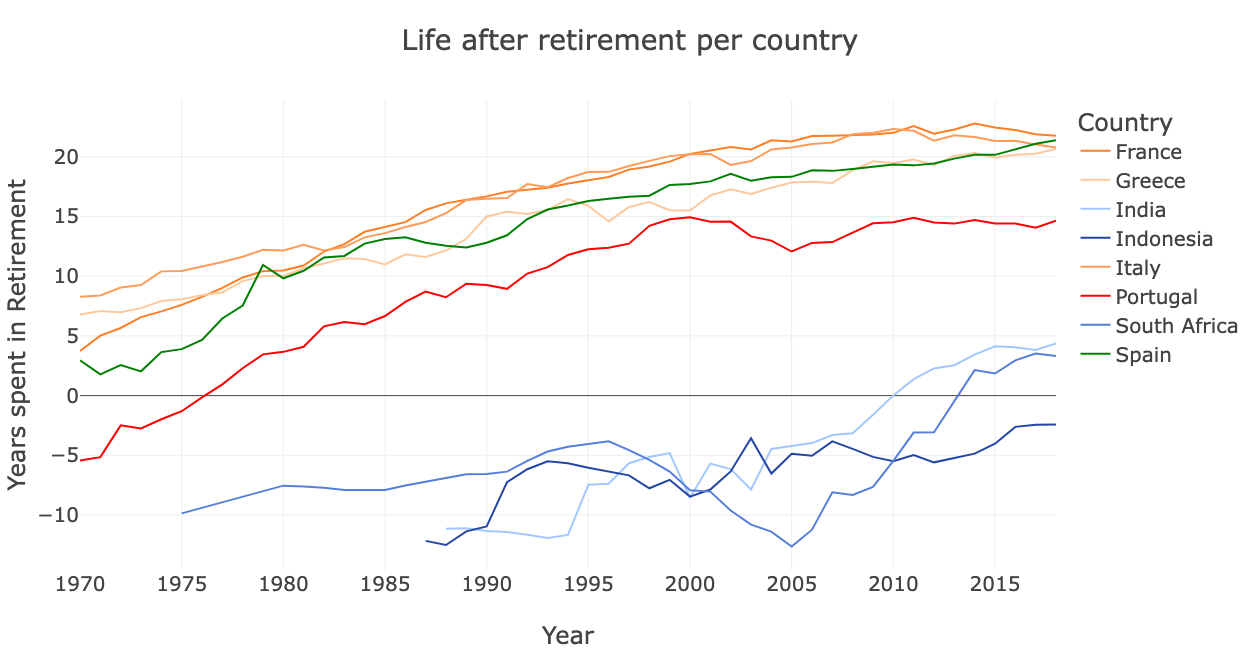

In [18]:
countries = select_countries(df, 'Retired')
fig = px.line(
    df.loc[df.Entity.isin(countries)],
    x='Year', y='Retired', color='Entity',
    title='Life after retirement per country',
    labels=label_dic,
    color_discrete_map=dict(zip(countries, color_list))
)
print_fig('LAR_country')

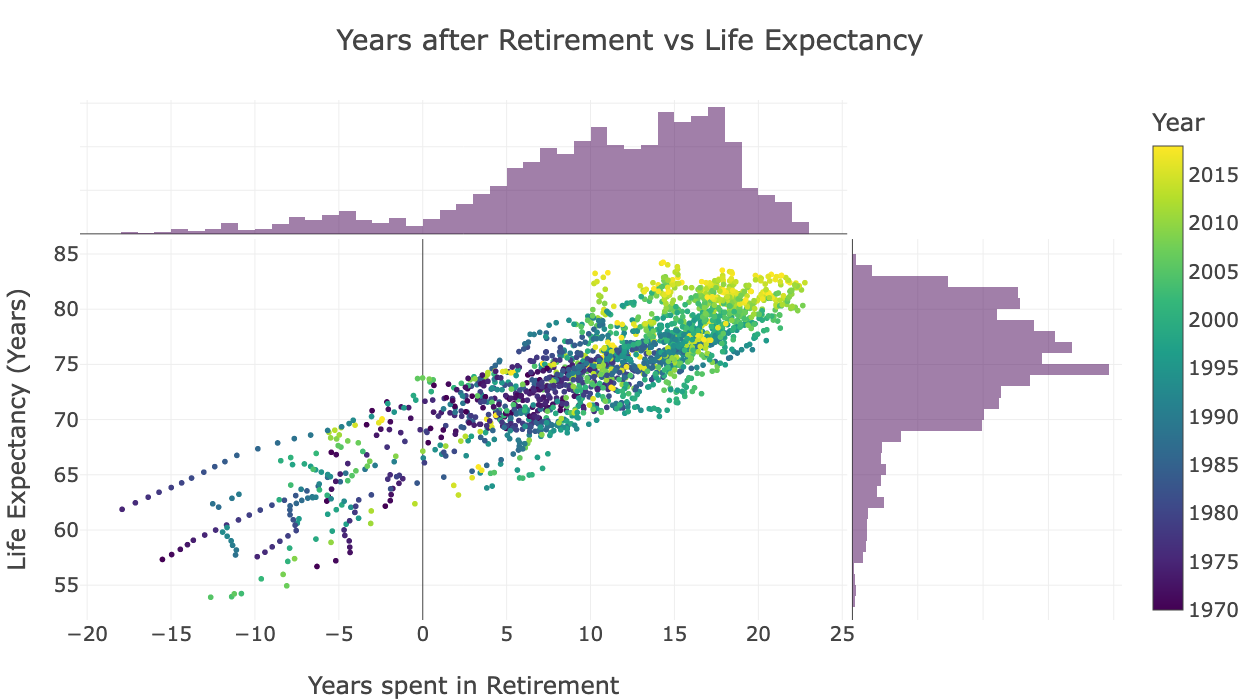

In [19]:
fig = px.scatter(
    df, x='Retired', y='Expectancy', color='Year',
    marginal_x='histogram', marginal_y='histogram',
    title='Years after Retirement vs Life Expectancy',
    labels=label_dic,
    hover_name='Entity'
)
print_fig('Retirement_vs_Expectancy', height=700)